In [1]:
##Imports 

import os
import numpy as np
import pandas as pd
import librosa
import random
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
##Keras
import pydot
import graphviz
#import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout,Average
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences

from keras.models import Model
#from keras.layers.conlutional import Conv1D
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
#from keras.models import Model, Sequential
#from keras.layers import Dense, Embedding, LSTM, Add,Average
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
#from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical

#from keras.models import Model, Sequential
from keras import optimizers
from tensorflow.keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape,Concatenate

from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import matplotlib.patheffects as pe
from sklearn.manifold import TSNE 
import seaborn as sb


In [2]:
## Reading files
files=os.listdir('E:/Audio_full/')
## Data sets
# - RAVDESS Both speech and song with 8 emotions 2364 files in total with 24 actors each
# - TESS 7 emotions 2800 files in total
# - SAVEE 4 Actors 480 files in total

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
#conda activate tensorflow-gpu

In [5]:
#Feeling dataset of corresponding audio

feeling_list=[]
for item in files:
    if item[6:-16]=='01' or item[2]=='n' or item[-11:-4]=='neutral' or item[6:-16]=='02':
        feeling_list.append('neutral')
    #elif :
        #feeling_list.append('calm')
    elif item[6:-16]=='03' or item[2]=='h' or item[-9:-4]=='happy':
        feeling_list.append('happy')
    elif item[6:-16]=='04' or item[2:4]=='sa' or item[-7:-4]=='sad':
        feeling_list.append('sad')
    elif item[6:-16]=='05' or item[2]=='a' or item[-9:-4]=='angry':
        feeling_list.append('angry')
    elif item[6:-16]=='07' or item[2]=='d' or item[-11:-4]=='disgust':
        feeling_list.append('disgust')
    elif item[6:-16]=='06' or item[2]=='f'or item[-8:-4]=='fear':
        feeling_list.append('fear')
    elif item[6:-16]=='08' or item[2:4]=='su' or item[-6:-4]=='ps':
        feeling_list.append('surprised')

In [6]:
labels = pd.DataFrame(feeling_list,columns=['emotions'])
labels

,emotions
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
5639,fear
5640,happy
5641,neutral
5642,surprised


In [7]:
## Converting the audio to data using MFCC PART 1
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(files):
    X, sample_rate = librosa.load('E:/Audio_full/'+y, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate, n_mfcc=50).T,axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1
df

,feature
0,"[-700.3989, 58.63021, -3.025852, 16.040241, 4...."
1,"[-653.169, 58.028076, -12.581207, 11.818786, -..."
2,"[-617.0523, 60.10337, -5.9842577, 13.886285, 1..."
3,"[-698.7211, 47.088486, -11.333614, 12.963088, ..."
4,"[-715.9226, 71.9768, 4.457525, 18.602499, 8.40..."
...,...
5639,"[-343.40387, 32.59755, -9.197987, 25.315773, 0..."
5640,"[-345.47714, 24.427338, -14.398651, 36.95299, ..."
5641,"[-416.72632, 71.14924, -1.1160216, 42.52479, -..."
5642,"[-374.82407, 46.681873, -12.381617, 18.139084,..."


In [8]:
df2=pd.DataFrame(df['feature'].values.tolist())
df2=df2.fillna(0)
df2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735005,-0.319724,...,-3.432791,-1.268412,-2.037442,-3.208719,-2.298195,-2.391170,-2.533661,-0.790085,-2.240257,-1.202297
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.561838,-0.344248,-0.597152,-2.483091,-2.482294,-1.513263,-0.206973,-2.042859,-2.453341,-2.000150
2,-617.052307,60.103371,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,3.856137,2.830290,0.607302,-0.470186,0.242361,-0.506050,0.155130,1.041393,0.215989,0.503251
3,-698.721130,47.088486,-11.333614,12.963088,-8.005651,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,3.345852,-0.199447,0.761450,0.445034,0.017971,-0.074606,-0.224912,-1.751279,-0.997531,0.558003
4,-715.922607,71.976799,4.457525,18.602499,8.404046,3.621954,-1.974365,0.022672,-2.678083,4.232803,...,0.427559,0.132589,-1.459148,-2.129129,-1.101375,1.795965,2.756026,1.120542,1.270001,1.677747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-343.403870,32.597549,-9.197987,25.315773,0.052862,0.853997,-11.733653,0.140329,-25.528193,4.334096,...,6.829886,1.623786,0.174217,-2.333187,0.229022,-2.646233,-0.123384,2.442371,1.630154,-2.707299
5640,-345.477142,24.427338,-14.398651,36.952991,-7.297604,1.008584,-15.700944,-10.525764,-6.183089,-6.078100,...,-1.621850,-5.776743,-3.046839,0.392119,0.650877,1.291245,0.535487,2.879143,0.849994,-6.130474
5641,-416.726318,71.149239,-1.116022,42.524792,-6.296183,2.258823,-6.628646,-7.701837,-10.190816,7.239936,...,7.608363,6.693035,-1.709971,-7.858405,-4.653687,2.703166,4.437060,-1.495853,-8.279791,-6.083230
5642,-374.824066,46.681873,-12.381617,18.139084,-22.662424,4.170814,-15.546303,-7.580999,-18.976576,6.013675,...,1.192490,1.591670,1.171150,0.643918,0.412878,-1.108500,1.322803,-0.409489,1.067348,-0.033086


In [9]:
#MEL spectogram part2
dfmelSp = pd.DataFrame(columns=['feature1'])
bookmark=0
for index,y in enumerate(files):
    X, sample_rate = librosa.load('E:/Audio_full/'+y,res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mel= np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
    feature = mel
    dfmelSp.loc[bookmark] = [feature]
    bookmark=bookmark+1
dfmelSp

,feature1
0,"[1.3591023e-06, 5.603021e-05, 0.003625807, 0.0..."
1,"[1.2332691e-05, 5.2230745e-05, 0.00011250672, ..."
2,"[2.6729702e-05, 0.00019209618, 0.0007873292, 0..."
3,"[6.656757e-06, 9.897744e-06, 1.4620192e-05, 7...."
4,"[0.00011870869, 0.00011706894, 0.0011368697, 0..."
...,...
5639,"[0.088534385, 0.032074165, 0.01548406, 0.01437..."
5640,"[0.0037470474, 0.0011213432, 0.0011808255, 0.0..."
5641,"[0.009096331, 0.0084486315, 0.008483385, 0.009..."
5642,"[0.019076487, 0.001114162, 0.0003238535, 0.000..."


In [10]:
dfmelSp2=pd.DataFrame(dfmelSp['feature1'].values.tolist())
dfmelSp2=dfmelSp2.fillna(0)
dfmelSp2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000001,0.000056,0.003626,0.020956,0.031414,0.017692,0.003454,0.018618,0.024684,0.020465,...,0.000002,0.000002,0.000001,6.755617e-07,3.586787e-07,3.909842e-07,2.609652e-07,6.226127e-08,1.362780e-08,1.109996e-09
1,0.000012,0.000052,0.000113,0.000077,0.000056,0.000892,0.010611,0.067382,0.132326,0.016235,...,0.000013,0.000009,0.000007,3.351835e-06,2.065444e-06,5.446865e-07,2.222711e-07,7.489701e-08,1.204194e-08,1.612842e-09
2,0.000027,0.000192,0.000787,0.002619,0.005716,0.046933,0.067469,0.030527,0.016795,0.009505,...,0.000045,0.000035,0.000022,1.127173e-05,6.057411e-06,2.383926e-06,1.396174e-06,7.454358e-07,1.715608e-07,2.231222e-08
3,0.000007,0.000010,0.000015,0.000008,0.000015,0.003372,0.008763,0.014438,0.032546,0.021561,...,0.000031,0.000026,0.000020,7.791955e-06,5.814118e-06,1.717594e-06,7.783661e-07,1.526976e-07,2.095097e-08,2.928901e-09
4,0.000119,0.000117,0.001137,0.003581,0.013649,0.008650,0.001231,0.002388,0.004787,0.014026,...,0.000003,0.000002,0.000002,9.353384e-07,4.004243e-07,2.418668e-07,7.589256e-08,2.278530e-08,4.165693e-09,3.284917e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.088534,0.032074,0.015484,0.014378,0.005388,0.002551,0.009657,0.521248,2.002649,0.849206,...,0.004074,0.003433,0.003914,3.691630e-03,1.624443e-03,3.285170e-04,2.007679e-04,6.891089e-05,2.034424e-05,3.410880e-06
5640,0.003747,0.001121,0.001181,0.001105,0.000706,0.001211,0.266760,2.143342,3.968316,3.609105,...,0.005176,0.005318,0.003357,2.874391e-03,2.240580e-03,6.783053e-04,1.343765e-04,7.181308e-05,3.513732e-05,1.744838e-05
5641,0.009096,0.008449,0.008483,0.009777,0.008108,0.011599,2.562184,7.563576,0.340539,0.011818,...,0.001646,0.002988,0.003047,2.352791e-03,9.355015e-04,1.696493e-04,5.026917e-05,1.020348e-05,4.442834e-06,4.414226e-07
5642,0.019076,0.001114,0.000324,0.000266,0.000249,0.001760,0.104751,0.308540,0.358288,0.242882,...,0.001825,0.002067,0.002671,1.932580e-03,1.206304e-03,1.850308e-04,8.864246e-05,1.673799e-05,6.823322e-06,6.962310e-07


In [11]:
newdf=pd.concat([df2,labels,dfmelSp2],axis=1)
newdf['emotions']
newdf[49]


0         neutral
1         neutral
2         neutral
3         neutral
4         neutral
          ...    
5639         fear
5640        happy
5641      neutral
5642    surprised
5643          sad
Name: emotions, Length: 5644, dtype: object

,49,49
0,-1.202297,0.000644
1,-2.000150,0.005754
2,0.503251,0.003092
3,0.558003,0.000424
4,1.677747,0.000418
...,...,...
5639,-2.707299,2.584399
5640,-6.130474,0.004410
5641,-6.083230,0.001173
5642,-0.033086,0.035044


In [12]:
newdf=shuffle(newdf)
newdf.shape
newdf

(5644, 179)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
2466,-395.827271,109.815002,26.334900,34.032913,15.383346,3.612015,-21.559561,-1.922961,-1.025764,-10.060621,...,5.988093e-06,1.842506e-06,5.611226e-07,4.509578e-07,4.783789e-07,5.055595e-07,5.169114e-07,5.141086e-07,5.031247e-07,4.917418e-07
2898,-477.751160,95.906578,9.930469,8.222509,-11.132051,2.174797,-22.116783,3.972046,-24.781950,1.014994,...,1.594053e-04,1.025494e-04,7.045877e-05,5.231352e-05,2.467163e-05,1.023444e-05,1.734145e-06,4.149469e-07,8.510043e-08,1.513139e-08
2807,-635.511292,143.350479,31.454308,36.235615,11.199054,-6.821490,-4.445740,2.376345,-8.011057,-12.235952,...,1.572271e-08,9.987369e-09,6.427498e-09,4.529917e-09,3.163819e-09,2.177597e-09,1.774798e-09,1.502753e-09,1.398907e-09,1.364231e-09
2480,-338.146210,109.372353,13.920223,33.369545,5.132312,2.439946,-28.102674,-6.727801,-0.976052,-15.288651,...,6.443388e-06,1.800071e-06,9.294707e-07,8.245880e-07,8.740222e-07,9.181483e-07,9.375869e-07,9.326237e-07,9.153359e-07,8.970123e-07
3433,-444.435394,70.364319,14.762432,19.777376,6.337432,10.598396,-18.977951,5.523309,-22.413912,1.024355,...,7.279449e-04,3.718181e-04,2.150821e-04,1.537552e-04,8.546136e-05,3.408233e-05,9.490821e-06,1.508427e-06,2.611371e-07,2.310411e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-616.977356,65.106079,-44.349960,19.407906,-2.108910,-20.398224,-19.426634,-10.607098,-6.794960,2.840420,...,8.187031e-06,5.235459e-06,2.537881e-06,9.923816e-07,1.467780e-06,1.440692e-06,4.680294e-07,1.425603e-07,2.132506e-08,2.032422e-09
1773,-485.176361,20.533010,-23.324465,-0.686083,-21.678753,-7.451090,-15.483243,-9.952831,-26.001814,2.710965,...,5.375385e-04,4.639467e-04,2.838194e-04,1.996884e-04,1.304702e-04,1.202550e-04,7.358295e-05,2.062457e-05,4.204000e-06,4.296666e-07
2094,-527.318298,26.068962,-28.148176,10.489081,-19.667913,-5.673967,-8.967707,-12.834253,-10.610332,-4.008108,...,8.703289e-04,8.815533e-04,6.582518e-04,9.203768e-04,5.013914e-04,3.233718e-04,1.378212e-04,2.803395e-05,5.412359e-06,8.532588e-07
4561,-314.353607,34.922459,-12.702803,23.294029,-3.972683,3.038771,-4.340724,2.760102,-11.703268,11.975477,...,7.516451e-03,5.683757e-03,8.292719e-03,1.278571e-02,5.974523e-03,1.160816e-03,4.339662e-04,1.370348e-04,2.476061e-05,3.089541e-06


In [13]:
#newdf.to_csv(r'E:\Fusion.csv',index=True,header=True)

In [14]:
y =newdf['emotions']
x=newdf.iloc[:,0:50]
x1=newdf.iloc[:,51:179]
x.shape,y.shape,x1.shape


##################### To be modified with

#newdf1 = np.random.rand(len(rnewdf)) < 0.8
#train = rnewdf[newdf1]
#test = rnewdf[~newdf1]

((5644, 50), (5644,), (5644, 128))

In [15]:
# For MFCC
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,shuffle=False)
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [16]:
# For MFCC
## CNN

#model = Sequential()

#model.add(Conv1D(64, 5,padding='same',input_shape=(50,1)))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling1D(pool_size=(4)))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling1D(pool_size=(4)))
#model.add(Conv1D(256, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(7))
#model.add(Activation('softmax'))


In [17]:
#model.summary()

In [18]:
#model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [19]:
## Converting emotions to int values MFCC
y_traincnn=[]
for lab in y_train:
    if lab=='neutral':
        y_traincnn.append(0)
    #elif lab=='calm':
        #y_traincnn.append(2)
    elif lab=='happy':
        y_traincnn.append(1)
    elif lab=='sad':
        y_traincnn.append(2)
    elif lab=='angry':
        y_traincnn.append(3)
    elif lab=='fear':
        y_traincnn.append(4)
    elif lab=='disgust':
        y_traincnn.append(5)
    elif lab=='surprised':
        y_traincnn.append(6)
y_traincnn=np.asarray(y_traincnn)
y_testcnn=[]
for lab in y_test:
    if lab=='neutral':
        y_testcnn.append(0)
    #elif lab=='calm':
        #y_testcnn.append(2)
    elif lab=='happy':
        y_testcnn.append(1)
    elif lab=='sad':
        y_testcnn.append(2)
    elif lab=='angry':
        y_testcnn.append(3)
    elif lab=='fear':
        y_testcnn.append(4)
    elif lab=='disgust':
        y_testcnn.append(5)
    elif lab=='surprised':
        y_testcnn.append(6)
y_testcnn=np.asarray(y_testcnn)

In [20]:
## Start CNN MFCC
#cnn=model.fit(x_traincnn, y_traincnn, batch_size=16, epochs=500, validation_data=(x_testcnn, y_testcnn))

In [21]:
#plt.plot(cnn.history['val_loss'])
#plt.plot(cnn.history['loss'])
#plt.title('loss per epoch')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper right')
#plt.show()

In [22]:
#plt.plot(cnn.history['val_accuracy'])
#plt.plot(cnn.history['accuracy'])
#plt.title('accuracy per epoch')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper right')
#plt.show()

In [23]:
#predictions = model.predict(x_testcnn)
#predictions
#np.argmax(model.predict(x_testcnn),axis=-1)

In [24]:
#y_testcnn

In [25]:
#from sklearn.metrics import classification_report
#report = classification_report(y_testcnn, predictions)
#print(report)
# 0 = neutral,1 = happy, 2 = sad, 3 = angry, 4 = fear, 5 = digust, 6 = surprised,

In [26]:
#loss, acc = model.evaluate(x_testcnn, y_testcnn)
#print("model, accuracy: {:5.2f}%".format(acc))

In [27]:
#model.save('E:/testingMFCC_model.h5')
#print("CNN MFCC MODEL SAVED")

In [28]:
#from keras import backend as K

#outputLayer=model.layers[13].output
#model.predict(x_traincnn).round(1)

In [29]:
## MEL CNN PART STARTS


Xmel_train, Xmel_test, ymel_train, ymel_test = train_test_split(x1,y, test_size = 0.20,shuffle=False)
xmel_traincnn = np.expand_dims(Xmel_train, axis=2)
xmel_testcnn = np.expand_dims(Xmel_test, axis=2)


#xmel_traincnn=np.asarray(xmel_traincnn)
#xmel_traincnn
##################### To be modified with

#newdf1 = np.random.rand(len(rnewdf)) < 0.8
#train = rnewdf[newdf1]
#test = rnewdf[~newdf1]

In [30]:
## MEL CNN model
#modelMel = Sequential()

#modelMel.add(Conv1D(64, 5,padding='same',input_shape=(128,1)))
#modelMel.add(Activation('relu'))
#modelMel.add(Dropout(0.1))
#modelMel.add(MaxPooling1D(pool_size=(4)))
#modelMel.add(Conv1D(128, 5,padding='same',))
#modelMel.add(Activation('relu'))
#modelMel.add(Dropout(0.1))
#modelMel.add(MaxPooling1D(pool_size=(4)))
#modelMel.add(Conv1D(256, 5,padding='same',))
#modelMel.add(Activation('relu'))
#modelMel.add(Dropout(0.1))
#modelMel.add(Flatten())
#modelMel.add(Dense(7))
#modelMel.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
#def model(inputs):
inputs=keras.Input(shape=(50,1),name="MFCC")
inputs1=keras.Input(shape=(128,1),name="MelSp")
conv1=Conv1D(64,kernel_size=3)(inputs)
acti1=Dense(64,activation="relu")(conv1)
drop1=Dropout(0.1)(acti1)
maxPool1=MaxPooling1D(pool_size=(4))(drop1)
conv2=Conv1D(128,kernel_size=3)(maxPool1)
acti2=Dense(128,activation="relu")(conv2)
drop2=Dropout(0.1)(acti2)
maxPool2=MaxPooling1D(pool_size=(4))(drop2)
conv3=Conv1D(256,kernel_size=2)(maxPool2)
acti3=Dense(256,activation="relu")(conv3)
drop3=Dropout(0.1)(acti3)
#flat=Flatten()(drop3)

flat=Flatten()(drop3)
acti4=Dense(7,activation="softmax")(flat)
#drop4=Dropout(0.1)(acti4)

#flat1=Flatten()(drop4)
#dens1=Dense(7)
#acti5=Dense(7,activation="softmax")(acti4)


#model=Model(inputs=inputs,outputs=acti4)



#MEL PART
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)


conv11=Conv1D(64,kernel_size=3)(inputs1)
acti11=Dense(64,activation="relu")(conv11)
drop11=Dropout(0.1)(acti11)
maxPool11=MaxPooling1D(pool_size=(4))(drop11)
conv21=Conv1D(128,kernel_size=3)(maxPool11)
acti21=Dense(128,activation="relu")(conv21)
drop21=Dropout(0.1)(acti21)
maxPool21=MaxPooling1D(pool_size=(4))(drop21)
conv31=Conv1D(256,kernel_size=2)(maxPool21)
acti31=Dense(256,activation="relu")(conv31)
drop31=Dropout(0.1)(acti31)

flat1=Flatten()(drop31)
acti41=Dense(7,activation="softmax")(flat1)
#drop4=Dropout(0.1)(acti4)

#flat1=Flatten()(drop4)
#acti5=Dense(7,activation="softmax")(acti4)

fusion=Concatenate()([acti4,acti41])

modelFuse=Model(inputs=[inputs,inputs1],outputs=fusion)

In [31]:
modelFuse.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [32]:
ymel_traincnn=[]
for lab in ymel_train:
    if lab=='neutral':
        ymel_traincnn.append(0)
    #elif lab=='calm':
        #y_traincnn.append(2)
    elif lab=='happy':
        ymel_traincnn.append(1)
    elif lab=='sad':
        ymel_traincnn.append(2)
    elif lab=='angry':
        ymel_traincnn.append(3)
    elif lab=='fear':
        ymel_traincnn.append(4)
    elif lab=='disgust':
        ymel_traincnn.append(5)
    elif lab=='surprised':
        ymel_traincnn.append(6)
ymel_traincnn=np.asarray(ymel_traincnn)
ymel_testcnn=[]
for lab in ymel_test:
    if lab=='neutral':
        ymel_testcnn.append(0)
    #elif lab=='calm':
        #y_testcnn.append(2)
    elif lab=='happy':
        ymel_testcnn.append(1)
    elif lab=='sad':
        ymel_testcnn.append(2)
    elif lab=='angry':
        ymel_testcnn.append(3)
    elif lab=='fear':
        ymel_testcnn.append(4)
    elif lab=='disgust':
        ymel_testcnn.append(5)
    elif lab=='surprised':
        ymel_testcnn.append(6)
ymel_testcnn=np.asarray(ymel_testcnn)

In [33]:
## Start CNN
#cnn1=modelMel.fit(xmel_traincnn, ymel_traincnn, batch_size=16, epochs=500, validation_data=(xmel_testcnn, ymel_testcnn))

cnn=modelFuse.fit([np.array(x_traincnn),np.array(xmel_traincnn)],np.array(ymel_traincnn),batch_size=16,epochs=200,validation_data=([x_testcnn,xmel_testcnn], ymel_testcnn))

Epoch 1/200
283/283 [==============================] - 5s 11ms/step - loss: 3.5705 - accuracy: 0.2119 - val_loss: 2.1628 - val_accuracy: 0.4588
Epoch 2/200
283/283 [==============================] - 2s 7ms/step - loss: 2.3055 - accuracy: 0.4009 - val_loss: 1.9240 - val_accuracy: 0.5518
Epoch 3/200
283/283 [==============================] - 2s 7ms/step - loss: 2.0023 - accuracy: 0.5262 - val_loss: 1.8040 - val_accuracy: 0.6138
Epoch 4/200
283/283 [==============================] - 2s 8ms/step - loss: 1.8897 - accuracy: 0.5688 - val_loss: 1.7157 - val_accuracy: 0.6395
Epoch 5/200
283/283 [==============================] - 2s 8ms/step - loss: 1.8138 - accuracy: 0.5803 - val_loss: 1.6565 - val_accuracy: 0.6422
Epoch 6/200
283/283 [==============================] - 2s 8ms/step - loss: 1.7325 - accuracy: 0.6027 - val_loss: 1.6048 - val_accuracy: 0.6678
Epoch 7/200
283/283 [==============================] - 2s 8ms/step - loss: 1.6590 - accuracy: 0.6353 - val_loss: 1.5862 - val_accuracy: 0.667

Epoch 58/200
283/283 [==============================] - 2s 7ms/step - loss: 1.1648 - accuracy: 0.8093 - val_loss: 1.1961 - val_accuracy: 0.8140
Epoch 59/200
283/283 [==============================] - 2s 8ms/step - loss: 1.1853 - accuracy: 0.8053 - val_loss: 1.2027 - val_accuracy: 0.8105
Epoch 60/200
283/283 [==============================] - 2s 8ms/step - loss: 1.1602 - accuracy: 0.8188 - val_loss: 1.2044 - val_accuracy: 0.8034
Epoch 61/200
283/283 [==============================] - 2s 8ms/step - loss: 1.1804 - accuracy: 0.8049 - val_loss: 1.1917 - val_accuracy: 0.8131
Epoch 62/200
283/283 [==============================] - 2s 8ms/step - loss: 1.1593 - accuracy: 0.8184 - val_loss: 1.1990 - val_accuracy: 0.8167
Epoch 63/200
283/283 [==============================] - 2s 8ms/step - loss: 1.1423 - accuracy: 0.8204 - val_loss: 1.1751 - val_accuracy: 0.8246
Epoch 64/200
283/283 [==============================] - 2s 7ms/step - loss: 1.1697 - accuracy: 0.8153 - val_loss: 1.1697 - val_accuracy:

Epoch 115/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0195 - accuracy: 0.8763 - val_loss: 1.1717 - val_accuracy: 0.8202
Epoch 116/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0141 - accuracy: 0.8788 - val_loss: 1.1368 - val_accuracy: 0.8255
Epoch 117/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0481 - accuracy: 0.8641 - val_loss: 1.1580 - val_accuracy: 0.8237
Epoch 118/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0279 - accuracy: 0.8687 - val_loss: 1.1555 - val_accuracy: 0.8220
Epoch 119/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0358 - accuracy: 0.8678 - val_loss: 1.1494 - val_accuracy: 0.8326
Epoch 120/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0408 - accuracy: 0.8617 - val_loss: 1.1501 - val_accuracy: 0.8202
Epoch 121/200
283/283 [==============================] - 2s 7ms/step - loss: 1.0251 - accuracy: 0.8728 - val_loss: 1.1612 - val_ac

283/283 [==============================] - 2s 8ms/step - loss: 0.9167 - accuracy: 0.9069 - val_loss: 1.1820 - val_accuracy: 0.8308
Epoch 172/200
283/283 [==============================] - 2s 8ms/step - loss: 0.9408 - accuracy: 0.9039 - val_loss: 1.1470 - val_accuracy: 0.8353
Epoch 173/200
283/283 [==============================] - 2s 8ms/step - loss: 0.9177 - accuracy: 0.9104 - val_loss: 1.1463 - val_accuracy: 0.8370
Epoch 174/200
283/283 [==============================] - 2s 7ms/step - loss: 0.9473 - accuracy: 0.8952 - val_loss: 1.1576 - val_accuracy: 0.8397
Epoch 175/200
283/283 [==============================] - 2s 7ms/step - loss: 0.9091 - accuracy: 0.9162 - val_loss: 1.1562 - val_accuracy: 0.8406
Epoch 176/200
283/283 [==============================] - 2s 7ms/step - loss: 0.9248 - accuracy: 0.9092 - val_loss: 1.1740 - val_accuracy: 0.8326
Epoch 177/200
283/283 [==============================] - 2s 7ms/step - loss: 0.9463 - accuracy: 0.8978 - val_loss: 1.1879 - val_accuracy: 0.8361

Text(0.5, 1.0, 'loss vs epoch')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

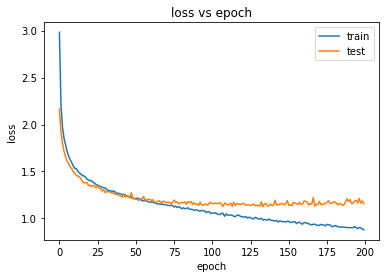

In [34]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'model vs epoch')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

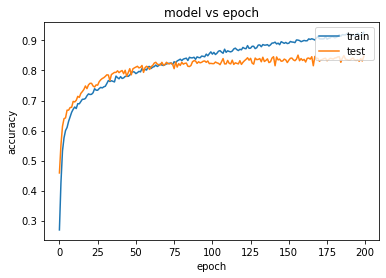

In [35]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('model vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:
Melpredictions = modelFuse.predict([x_testcnn,xmel_testcnn])
Melpredictions
#np.argmax(modelMel.predict(xmel_testcnn),axis=-1)

array([[1.09554296e-10, 1.00000000e+00, 3.81513682e-10, ...,
        1.42472997e-01, 8.60176459e-02, 2.07844540e-01],
       [1.57840364e-03, 7.81314731e-01, 1.23702723e-03, ...,
        2.36961246e-01, 1.18452996e-01, 9.85753685e-02],
       [2.32915883e-14, 1.37923357e-14, 9.81324854e-15, ...,
        1.63073093e-01, 1.20741390e-01, 1.51594296e-01],
       ...,
       [6.04794479e-07, 1.51059476e-06, 1.79347280e-05, ...,
        1.63346246e-01, 1.25362501e-01, 1.59055918e-01],
       [1.14336884e-09, 1.34712774e-09, 6.69600963e-12, ...,
        2.17663333e-01, 8.49119574e-02, 1.79310009e-01],
       [6.15688332e-05, 2.11506709e-02, 9.95365990e-05, ...,
        1.37536764e-01, 1.44367665e-01, 1.48874894e-01]], dtype=float32)

In [37]:
ymel_testcnn

array([1, 1, 6, ..., 3, 4, 6])

In [38]:
modelFuse.summary()
keras.utils.plot_model(modelFuse, "Fusion.png", show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
MFCC (InputLayer)               [(None, 50, 1)]      0                                            
__________________________________________________________________________________________________
MelSp (InputLayer)              [(None, 128, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 48, 64)       256         MFCC[0][0]                       
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 126, 64)      256         MelSp[0][0]                      
______________________________________________________________________________________________

In [39]:
from sklearn.metrics import classification_report
#report = classification_report(ymel_testcnn, Melpredictions)
#print(report)
# 0 = neutral,1 = happy, 2 = sad, 3 = angry, 4 = fear, 5 = digust, 6 = surprised,

In [40]:
loss, acc = modelFuse.evaluate([x_testcnn,xmel_testcnn], ymel_testcnn)
print("model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 2ms/step - loss: 1.1556 - accuracy: 0.8477
model, accuracy: 84.77%
